In [44]:
## Here, we study a packet capture in which client Wi-Fi devices have their real MAC unmasked by fake networks. Nearly all devices randomize MAC addresses in public, but reveal their true MAC if they detect a trusted network.
## We will use many fake network to fingerprint client devices by which Wi-Fi networks they have connected to before. You can also see this as brute-forcing the "Preferred network list" stored inside each client device.
##
## This dataset was taken on a Red Line Metro train riding from Wilshire & Vermont to Hollywood & Highland during rush hour. 
##
## Tools used: ESP8266 with the "Beacon Spammer" Arduino sketch and a list of common Wi-Fi network names, Wireshark.
##
## CSV data is recorded from Wireshark capturing on the same channel as the ESP8266 is broadcasting on. Only directed packets (probes, authentication, association) from clients to fake networks have been exported.
##
## 
## Let's examine some data from the import, starting with a sample of 5 entries.


## We import a Wireshark export of devices responding to fake networks from the ESP8266 with authentication frames

import pandas as pd
from matplotlib import pyplot as plt
wd = pd.read_csv('/Users/skickar/MetroWilshireVermonttoHollywoodHighland.csv', delimiter = ',', encoding='latin-1', header=0) 
wd.tail()


,No.,Time,Source,Destination,Protocol,Length,Channel frequency,Data rate (Mb/s),Channel,Channel.1,Transmitter address,Destination address,Type/Subtype,Info
12389,562980,640.910788,SamsungE_d3:1f:1b,6c:3f:23:e3:70:0c,802.11,70,2412,1,1,1,24:18:1d:d3:1f:1b,6c:3f:23:e3:70:0c,Authentication,"Authentication, SN=2137, FN=0, Flags=....R...C"
12390,563024,640.955612,SamsungE_d3:1f:1b,6c:3f:23:e3:70:0c,802.11,70,2412,1,1,1,24:18:1d:d3:1f:1b,6c:3f:23:e3:70:0c,Authentication,"Authentication, SN=2137, FN=0, Flags=....R...C"
12391,563049,640.982755,SamsungE_d3:1f:1b,6c:3f:23:e3:70:0c,802.11,70,2412,1,1,1,24:18:1d:d3:1f:1b,6c:3f:23:e3:70:0c,Authentication,"Authentication, SN=2137, FN=0, Flags=....R...C"
12392,563062,640.996201,SamsungE_d3:1f:1b,6c:3f:23:e3:70:0c,802.11,70,2412,1,1,1,24:18:1d:d3:1f:1b,6c:3f:23:e3:70:0c,Authentication,"Authentication, SN=2138, FN=0, Flags=....R...C"
12393,563067,641.001216,SamsungE_d3:1f:1b,6c:3f:23:e3:70:0c,802.11,70,2412,1,1,1,24:18:1d:d3:1f:1b,6c:3f:23:e3:70:0c,Authentication,"Authentication, SN=2138, FN=0, Flags=....R...C"


In [45]:
## Examining the contents of a directed probe request to a fake network from a client
wd.iloc[61]

No.                                                                 2843
Time                                                             3.83517
Source                                                 SamsungE_ed:28:4d
Destination                                            6c:3f:23:e3:70:38
Protocol                                                          802.11
Length                                                               109
Channel frequency                                                   2412
Data rate (Mb/s)                                                       1
Channel                                                                1
Channel.1                                                              1
Transmitter address                                    dc:44:b6:ed:28:4d
Destination address                                    6c:3f:23:e3:70:38
Type/Subtype                                               Probe Request
Info                   Probe Request, SN=1389, FN=0

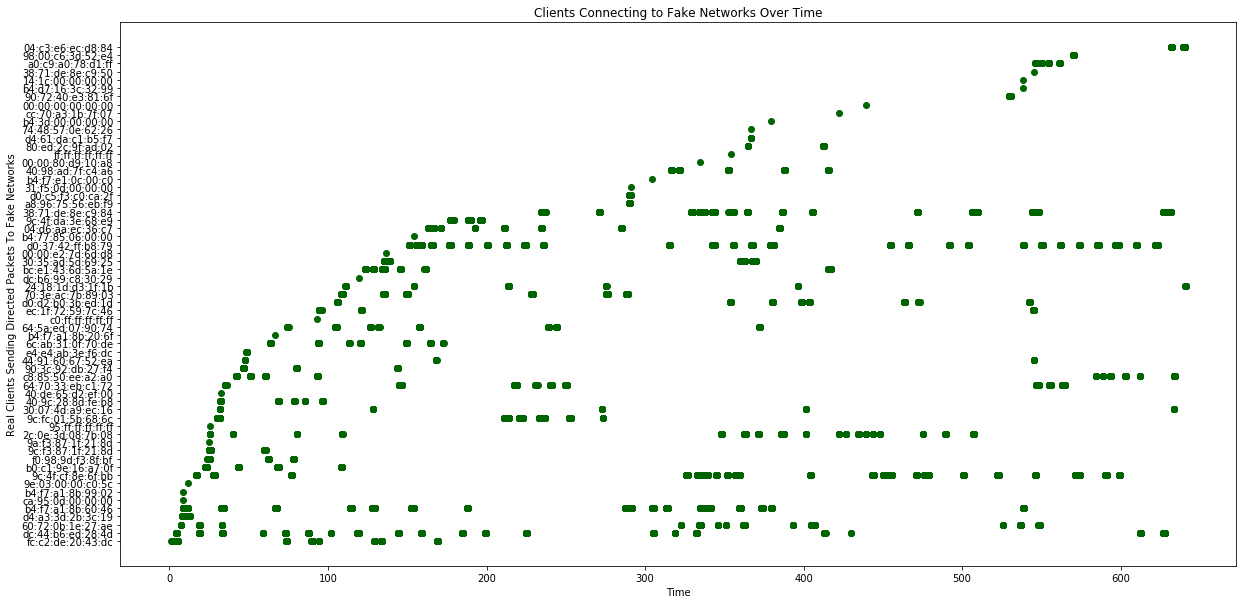

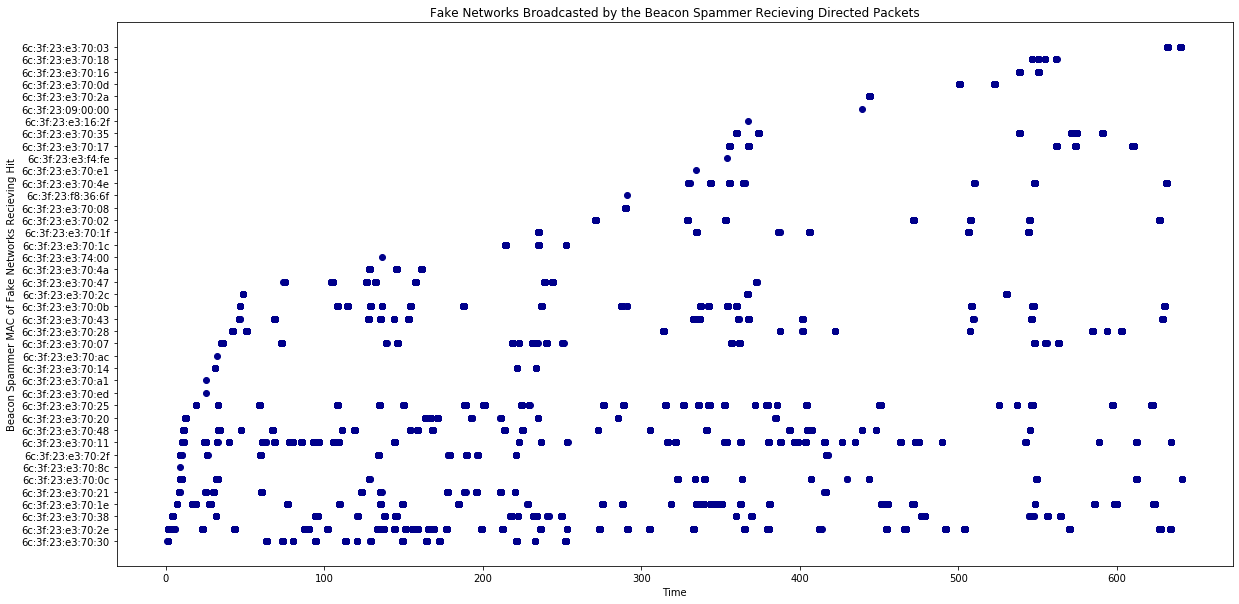

In [47]:
## Plotting directed packets (unmasked clients) connecting to fake networks over time
# Here, we analyze when a clients is connecting to a fake network over time in the first figure.
# In the second, we analyze which fake networks are recieving directed packets from unmasked clients over time.
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(wd['Time'], wd['Transmitter address'], 'o', color='DarkGreen')
plt.title('Clients Connecting to Fake Networks Over Time')
plt.xlabel('Time')
plt.ylabel('Real Clients Sending Directed Packets To Fake Networks')
plt.show()
plt.plot(wd['Time'], wd['Destination address'], 'o', color='DarkBlue')
plt.title('Fake Networks Broadcasted by the Beacon Spammer Recieving Directed Packets')
plt.xlabel('Time')
plt.ylabel('Beacon Spammer MAC of Fake Networks Recieving Hit')
plt.show()

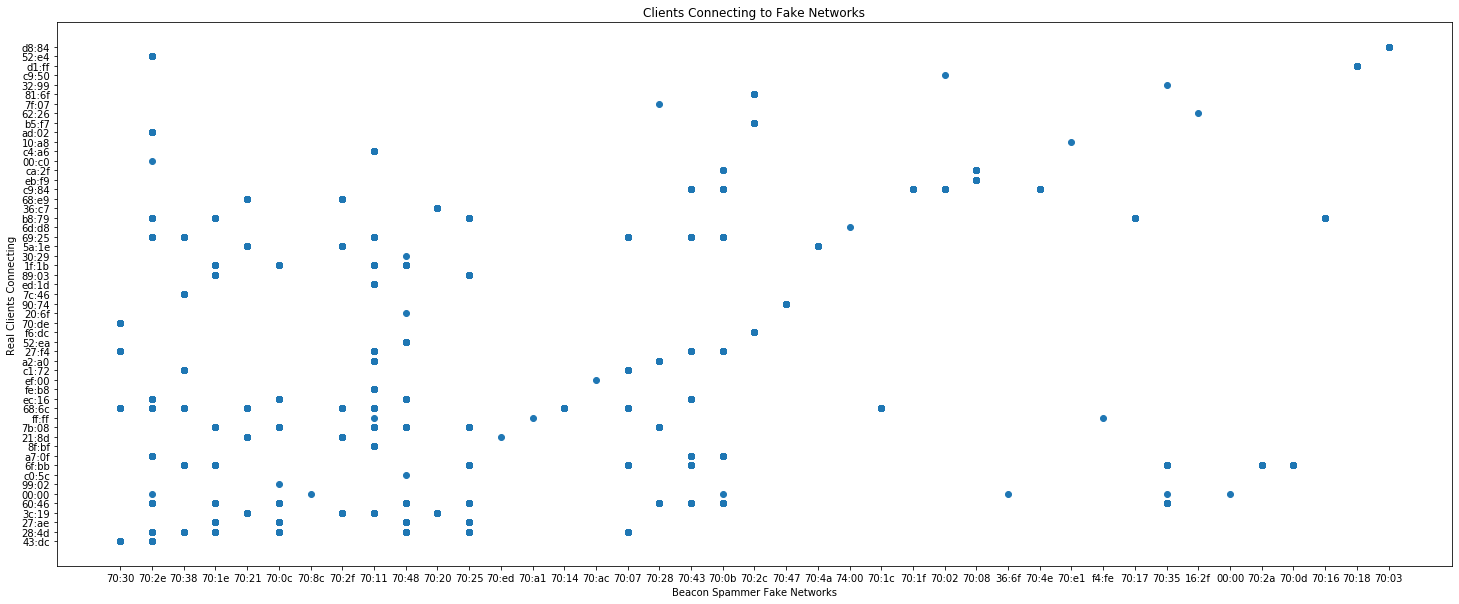

In [4]:
## Plotting which client MAC addresses responds to which fake network MAC addresses
## Here, we see a fingerprint for every client device on the left. 
## We can scan the row a device is in to determine which unique fake networks it will respond to.
## We can scan a column to find which fake networks cause the most client devices to respond. 
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(wd['Destination address'].str[-5:], wd['Transmitter address'].str[-5:], 'o',)
plt.title('Clients Connecting to Fake Networks')
plt.xlabel('Beacon Spammer Fake Networks')
plt.ylabel('Real Clients Connecting')
plt.show()

In [10]:
## List of unique transmitted MAC addresses as matched by Wireshark
src_dst = wd[["Source","Destination"]]
src_dst['Source'].unique()


array(['MurataMa_20:43:dc', 'SamsungE_ed:28:4d', 'BluProdu_1e:27:ae',
       'Apple_2b:3c:19', 'LgElectr_8b:60:46', 'ca:95:0d:00:00:00',
       'LgElectr_8b:99:02', '9e:03:00:00:c0:5c', 'TctMobil_8e:6f:bb',
       'Zte_16:a7:0f', 'Apple_f3:8f:bf', 'Apple_1f:21:8d',
       '9a:f3:87:1f:21:8d', 'SamsungE_08:7b:08', '95:ff:ff:ff:ff:ff',
       'Apple_5b:68:6c', 'SamsungE_a9:ec:16', 'Apple_8d:fe:b8',
       '40:de:65:d2:ef:00', 'Apple_eb:c1:72', 'Apple_ee:a2:a0',
       'Apple_db:27:f4', 'MurataMa_67:52:ea', 'Apple_3e:f6:dc',
       'Apple_0f:70:de', 'LgElectr_8b:20:6f', 'Apple_07:90:74',
       'c0:ff:ff:ff:ff:ff', 'SamsungE_59:7c:46', 'Apple_3b:ed:1d',
       'Apple_7b:89:03', 'SamsungE_d3:1f:1b', 'dc:b6:99:c8:30:29',
       'Apple_6d:5a:1e', 'Apple_5d:69:25', 'AcerCoun_7d:6d:d8',
       'YulongCo_ff:b8:79', 'b4:77:85:06:00:00', 'SamsungE_ec:36:c7',
       'Apple_3e:68:e9', 'Apple_8e:c9:84', 'Motorola_56:eb:f9',
       'Apple_c0:ca:2f', '31:f5:0d:00:00:00', 'b4:f7:e1:0c:00:c0',
       'A

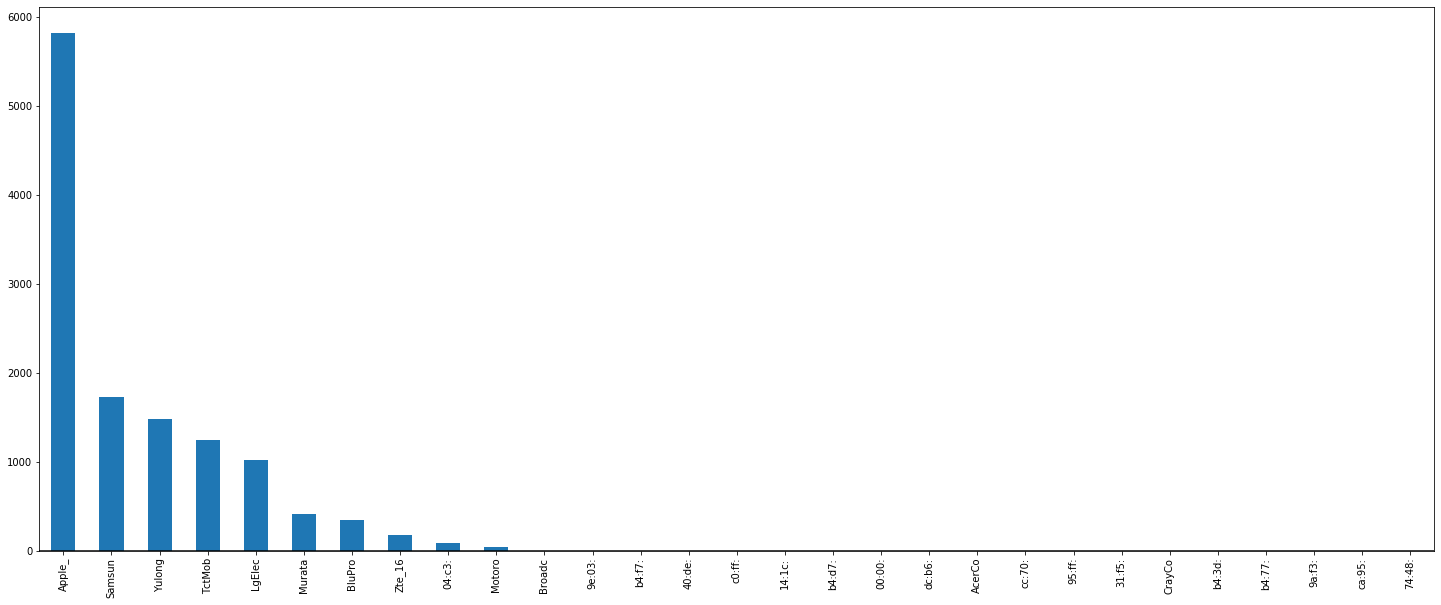

In [43]:
# Frequencey of manufacturer types - Packets matched to manufacturers by Wireshark
# The graph shows how many packets were recieved by a device from a particular manufacturer.

plt.figure();
src_dst['Source'].str[:6].value_counts().plot.bar()
plt.axhline(0, color='k');